In [315]:
import sys
sys.path.append("../../")

import matplotlib.pyplot as plt
import healpy as hp
from pylab import cm as cmaps
from tqdm import *
from astropy import units as u
from pylab import rcParams
import matplotlib.pylab as pylab
from cycler import cycler
import palettable

from theory.units import *
from simulation.astrometry_sim import QuasarSim
from simulation.estimator_wholesky import get_vector_alm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
params = {'text.usetex': True,
          'font.family': 'serif',
          'font.serif': ['CMU Serif'],
          'font.sans-serif': ['CMU Sans Serif'],
          'legend.fontsize': 17,
          'legend.fancybox': True,
          'legend.frameon': False,
          'legend.framealpha': 0.4,
          'legend.labelspacing': 0.5,
          'figure.figsize': (6.4/1.1, 4.8/1.1),
          'axes.labelsize': 19,
          'axes.titlesize':18,
          'axes.titlepad':10,
          'axes.linewidth':1.1,
          'axes.labelpad':10,
          'axes.prop_cycle': cycler('color', palettable.cartocolors.qualitative.Bold_10.hex_colors) + 
                            cycler(alpha=10*[.7]), 
          'lines.linewidth':2.5,
          'xtick.labelsize':18,
          'ytick.labelsize':18,
          'xtick.top':True,
          'ytick.right':True,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 5,
          'xtick.minor.size': 2,
          'ytick.major.size': 5,
          'ytick.minor.size': 2,
          'xtick.major.width': 1,
          'ytick.major.width': 1,
          'xtick.minor.width': 0.8,
          'ytick.minor.width': 0.8,
         }
pylab.rcParams.update(params)

In [225]:
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/draft/plots/"
data_dir = "/Users/smsharma/QuasarSims/"

In [14]:
max_sep = 20
nside = 128
lmax = 3*nside - 1

sim = QuasarSim(max_sep=max_sep, 
                verbose=True, 
                sim_uniform=True, 
                nside=nside, 
                calc_powerspecs=True, 
                do_alpha=True)

sim.set_mass_distribution(sim.rho_M_SI, M_min=1e7*M_s, M_max=1e10*M_s, M_min_calib=1e8*M_s, M_max_calib=1e10*M_s, N_calib=150, alpha=-1.9)
sim.set_radial_distribution(sim.r2rho_V_ein_EAQ, R_min=1e-3*kpc, R_max=260*kpc)
sim.set_subhalo_properties(sim.c200_SCP, distdep=False)

sim.analysis_pipeline()

Simulating 1189 subhalos between 7.0 and 10.0


In [115]:
np.save("../../data/mu_qsrs", sim.mu_qsrs)
np.save("../../data/alpha_qsrs", sim.alpha_qsrs)

In [195]:
maxx = 8e-4
maxx_a = 2e-10

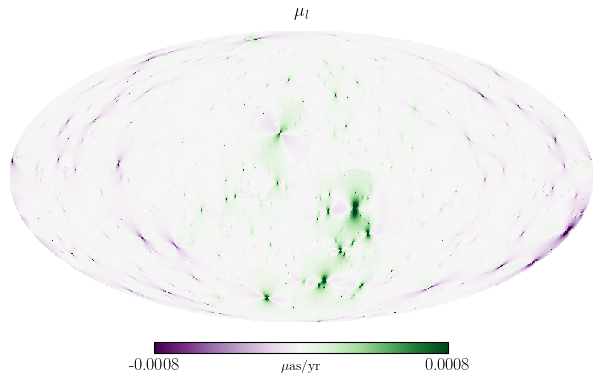

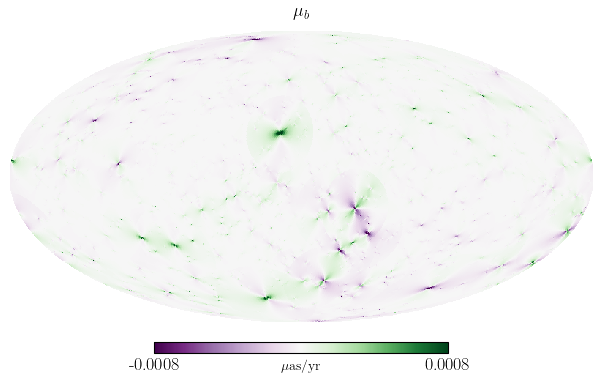

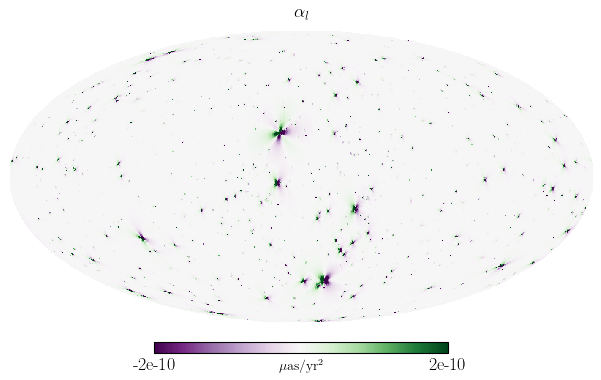

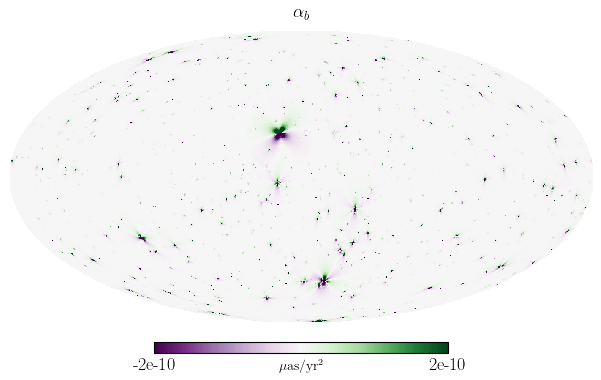

In [194]:
cmap = cmaps.PRGn
# cmap = palettable.cmocean.diverging.Curl_14_r.get_mpl_colormap()
cmap.set_under('w')

hp.mollview(1e6*sim.mu_qsrs[:,0],max=maxx, min=-maxx, title="$\mu_l$", unit='$\mu$as/yr', cmap=cmap)
plt.savefig(plots_dir + "/mu_l.pdf" )
hp.mollview(1e6*sim.mu_qsrs[:,1],max=maxx, min=-maxx, title="$\mu_b$", unit='$\mu$as/yr', cmap=cmap)
plt.savefig(plots_dir + "/mu_b.pdf" )
hp.mollview(1e6*sim.alpha_qsrs[:,0],max=maxx_a, min=-maxx_a, title="$\\alpha_l$", unit='$\mu$as/yr$^2$', cmap=cmap)
plt.savefig(plots_dir + "/alpha_l.pdf" )
hp.mollview(1e6*sim.alpha_qsrs[:,1],max=maxx_a, min=-maxx_a, title="$\\alpha_b$", unit='$\mu$as/yr$^2$', cmap=cmap)
plt.savefig(plots_dir + "/alpha_b.pdf" )

In [196]:
lmin_plot = 10
lmax_plot = 300

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '$\\log_{10}(|\\Psi_{lm}|^2\\,[\\mu$as$^2$\\,yr$^{-2}])$')

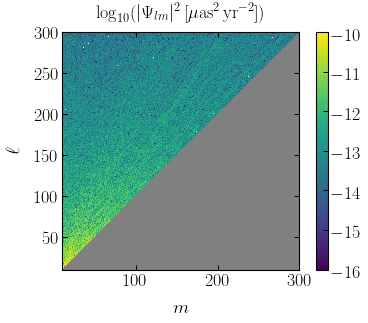

In [197]:
plt.imshow((np.log10((np.abs(sim.fB*1e6)**2)[lmin_plot:lmax_plot,lmin_plot:lmax_plot])), 
           origin='lower', vmin=-16, vmax=-10,
           extent=[lmin_plot,lmax_plot, lmin_plot, lmax_plot]
          )
cbar = plt.colorbar()

plt.xlabel("$m$")
plt.ylabel("$\ell$")

plt.title("$\log_{10}(|\Psi_{lm}|^2\,[\mu$as$^2$\,yr$^{-2}])$")

In [226]:
nch = 2
nsim = 200

ch_ary = np.zeros((nsim, nch, lmax))

for i in tqdm_notebook(range(nsim)):
    fB = np.load(data_dir + "/lcdm_nside128_sep20_mc" + str(i) + ".npz")['fB']
    ch_ary[i, :, :] = np.transpose([[np.mean(split_ary) for split_ary in np.array_split((np.abs(fB)**2)[l][:l], nch)] for l in range(lmax)])

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [212]:
ch_1 = 1e12*2*np.percentile(ch_ary[:,0,1:], [16,50,84], axis=0)
ch_2 = 1e12*2*np.percentile(ch_ary[:,1,1:], [16,50,84], axis=0)

ell = np.arange(1, len(ch_1[0]) + 2)

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


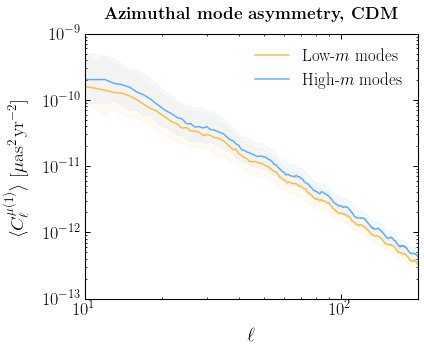

In [223]:
rcParams['figure.figsize'] = 6, 5

alpha_plot = 0.05
lw_plot = 1.5

plt.plot(ell[1:], ch_1[1], label="Low-$m$ modes", color='orange', lw = lw_plot)
plt.fill_between(ell[1:], ch_1[0], ch_1[2], alpha=alpha_plot, color='orange')

plt.plot(ell[1:], ch_2[1], label="High-$m$ modes", color='dodgerblue', lw = lw_plot)
plt.fill_between(ell[1:], ch_2[0], ch_2[2], alpha=alpha_plot, color='dodgerblue')

plt.xlim(10, 200)
plt.ylim(1e-13,1e-9)
plt.xscale("log")
plt.yscale("log")

plt.legend(frameon=False)

plt.title('\\textbf{Azimuthal mode asymmetry, CDM}', fontsize=17, y=1.02)

plt.xlabel("$\ell$")
plt.ylabel("$\langle C_\ell^{\\mu (1)}\\rangle$ [$\mu$as$^2$\,yr$^{-2}$]")

plt.tight_layout()
# plt.savefig(plots_dir + "m_asymm_2.pdf")

In [227]:
fB_ary = np.zeros((lmax, lmax))
for i in tqdm_notebook(range(nsim)):
    fB = np.load(data_dir + "/lcdm_nside128_sep20_mc" + str(i) + ".npz")['fB']
    fB_ary += np.abs(fB*1e6)**2
fB_ary /= nsim

In [228]:
lmin_plot = 10
lmax_plot = 300

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


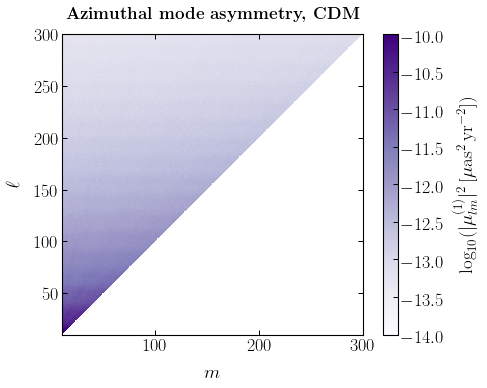

In [244]:
rcParams['figure.figsize'] = 7, 5.5

plt.imshow((np.log10((fB_ary)[lmin_plot:lmax_plot,lmin_plot:lmax_plot])), 
           origin='lower', vmin=-14, vmax=-10,
           extent=[lmin_plot,lmax_plot, lmin_plot, lmax_plot],
           cmap=plt.get_cmap('Purples')
          )
cbar = plt.colorbar(label="$\log_{10}(|\mu_{lm}^{(1)}|^2\,[\mu$as$^2$\,yr$^{-2}])$")

plt.xlabel("$m$")
plt.ylabel("$\ell$")

plt.title('\\textbf{Azimuthal mode asymmetry, CDM}', fontsize=17, y=1.02)

plt.tight_layout()
# plt.savefig(plots_dir + "m_asymm_1.pdf")

In [238]:
fB_ary_compressed = (fB_ary)[lmin_plot:lmax_plot,lmin_plot:lmax_plot]

In [304]:
l = 200
av_ary = np.zeros_like(fB_ary)
for l in range(len(av_ary)):
    thing = np.where(fB_ary[l, :]!=0,fB_ary[l, :],np.nan)
    av_ary[l, :l] = ((thing - np.nanmean(thing)) / thing)[:l]
# plt.plot((thing - np.nanmean(thing)) / thing)

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


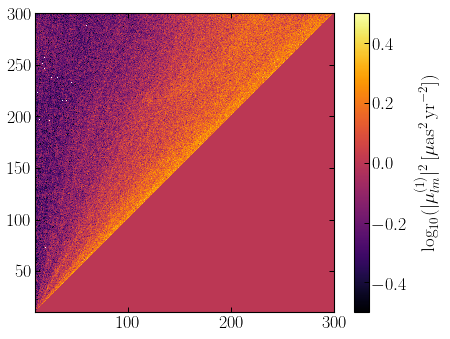

In [314]:
plt.imshow(av_ary, 
           origin='lower', vmin=-0.5, vmax=0.5,
           extent=[lmin_plot,lmax_plot, lmin_plot, lmax_plot],
           cmap=plt.get_cmap('inferno')
          )

cbar = plt.colorbar(label="$\log_{10}(|\mu_{lm}^{(1)}|^2\,[\mu$as$^2$\,yr$^{-2}])$")

In [239]:
fB_ary_compressed_means = np.nanmean(np.where(fB_ary_compressed!=0,fB_ary_compressed,np.nan),axis=1)

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


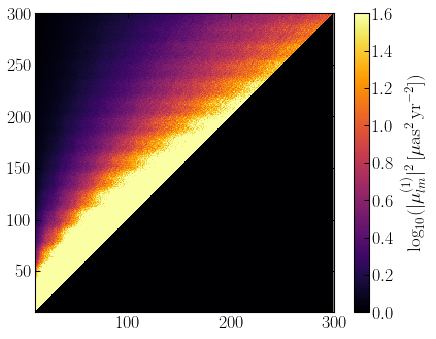

In [241]:
fB_ary_compressed_means = np.nanmean(np.where(fB_ary_compressed!=0,fB_ary_compressed,np.nan),axis=0)

plt.imshow(fB_ary_compressed/fB_ary_compressed_means, 
           origin='lower', vmin=0.0, vmax=1.6,
           extent=[lmin_plot,lmax_plot, lmin_plot, lmax_plot],
           cmap=plt.get_cmap('inferno')
          )

cbar = plt.colorbar(label="$\log_{10}(|\mu_{lm}^{(1)}|^2\,[\mu$as$^2$\,yr$^{-2}])$")

/Users/smsharma/.conda/envs/Lensing-PowerSpectra/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


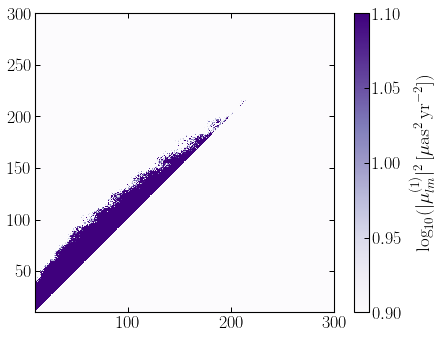

In [233]:
fB_ary_compressed_means = np.nanmean(np.where(fB_ary_compressed!=0,fB_ary_compressed,np.nan),axis=0)

plt.imshow(((fB_ary_compressed - fB_ary_compressed_means) / fB_ary_compressed_means), 
           origin='lower', vmin=0.9, vmax=1.1,
           extent=[lmin_plot,lmax_plot, lmin_plot, lmax_plot],
           cmap=plt.get_cmap('Purples')
          )

cbar = plt.colorbar(label="$\log_{10}(|\mu_{lm}^{(1)}|^2\,[\mu$as$^2$\,yr$^{-2}])$")